In [1]:
#__________________________________________BEGINNING OF LECTURE CODE
using LinearAlgebra
using Plots
default(linewidth=4, legendfontsize=12)

function vander(x, k=nothing)
    if isnothing(k)
        k = length(x)
    end
    m = length(x)
    V = ones(m, k)
    for j in 2:k
        V[:, j] = V[:, j-1] .* x
    end
    V
end

function gram_schmidt_classical(A)
    m, n = size(A)
    Q = zeros(m, n)
    R = zeros(n, n)
    for j in 1:n
        v = A[:,j]
        R[1:j-1,j] = Q[:,1:j-1]' * v
        v -= Q[:,1:j-1] * R[1:j-1,j]
        R[j,j] = norm(v)
        Q[:,j] = v / R[j,j]
    end
    Q, R
end

function qr_householder(A)
    m, n = size(A)
    R = copy(A)
    V = [] # list of reflectors
    for j in 1:n
        v = copy(R[j:end, j])
        v[1] += sign(v[1]) * norm(v) # <---
        v = normalize(v)
        R[j:end,j:end] -= 2 * v * v' * R[j:end,j:end]
        push!(V, v)
    end
    V, R
end

function qr_chol(A)
    R = cholesky(A' * A).U
    Q = A / R
    Q, R
end

function qr_chol2(A)
    Q, R = qr_chol(A)
    Q, R1 = qr_chol(Q)
    Q, R1 * R
end

function qr_chol(A)
    R = cholesky(A' * A).U
    Q = A / R
    Q, R
end

A = rand(10,4)
@show cond(A)
Q, R = qr_chol(A)
@show norm(Q' * Q - I)
@show norm(Q * R - A)

cond(A) = 7.4805782040189435
norm(Q' * Q - I) = 3.667664366864928e-15
norm(Q * R - A) = 3.281150467309393e-16


3.281150467309393e-16

In [2]:
x = LinRange(-1, 1, 15)
A = vander(x)
@show(cond(A))
Q, R = qr_chol(A)
@show norm(Q' * Q - I)
@show norm(Q * R - A);
#__________________________________________END OF LECTURE CODE

cond(A) = 1.1048085293535397e6
norm(Q' * Q - I) = 3.96379936896747e-5
norm(Q * R - A) = 6.16075530418861e-16


6.16075530418861e-16

In [3]:
m, n = 5000, 2000
A = randn(m, n)

e = @elapsed qr(A)

3.376829125

In [4]:
A = randn(m, n)
e = @elapsed qr_chol(A)

0.841482557

In [130]:
#function to find least squares solution via QR
function least_squares(Q, R, A)
    R_inv = inv(R)    #use Moore-Penrose pseudo inverse to approximate non-invertible R
    return norm(R_inv * Q' * b)   #norm of least_squares sol from Cholesky Factor A^TA
end

#create two lists
y_chol = []  #will store error 
y_qr = []
b = rand(10)
k = 10000
for i in 1:k
    A = rand(10, 4)
    cond_num = cond(A)
    #chol qr
    qr_time = @elapsed qr_chol(A)
    Q, R = qr_chol(A)
    accuracy = norm(Q * R - A)
    sol_time = @elapsed least_squares(Q, R, A)
    sol = least_squares(Q, R, A)
    push!(y_chol, (cond_num, accuracy, qr_time, sol, sol_time))
    #grahm schmidt classic
    qr_time = @elapsed gram_schmidt_classical(A)
    Q, R = gram_schmidt_classical(A)
    accuracy = norm(Q * R - A)
    sol_time = @elapsed least_squares(Q, R, A)
    sol = least_squares(Q, R, A)
    push!(y_qr, (cond_num, accuracy, qr_time, sol, sol_time))      #tuple(conditionnumber, error of QR (difference), qr time elapsed, least_squares sol, sol time)
end
y_chol = sort(y_chol);  #sort both lists by condition number
y_qr = sort(y_qr);
#use getfield.(tuplelist, 1) to get first tuple element as list for plotting

10000-element Vector{Any}:
 (2.9664829445410805, 1.6176703347518483e-16, 2.614e-6, 0.8463778820018477, 3.809e-6)
 (3.149260936402743, 1.7612356221354063e-16, 2.721e-6, 0.8320941965841977, 3.056e-6)
 (3.1751435734816944, 2.794143609777378e-16, 2.945e-6, 0.5997362591848048, 3.221e-6)
 (3.2837120502197705, 1.3877787807814457e-16, 2.775e-6, 0.7310811534160148, 2.671e-6)
 (3.3142629469148353, 1.986996825864056e-16, 2.758e-6, 0.7824035880601709, 3.383e-6)
 (3.314920820541306, 1.5321890477073013e-16, 3.251e-6, 0.6718554214949657, 3.312e-6)
 (3.3288866435326487, 2.7608854405660734e-16, 2.715e-6, 0.9158907760551281, 3.336e-6)
 (3.3356067002117955, 1.6783841843332958e-16, 4.483e-6, 0.8780276926760525, 3.462e-6)
 (3.343621705926223, 2.822912692850418e-16, 4.679e-6, 0.6479913237955781, 6.521e-6)
 (3.354111677359147, 1.7270738262650302e-16, 3.366e-6, 0.6681611273945507, 3.131e-6)
 (3.363565945686643, 2.1000903724951387e-16, 7.713e-6, 0.6785630581710826, 3.453e-6)
 (3.367046734261844, 2.092050620472

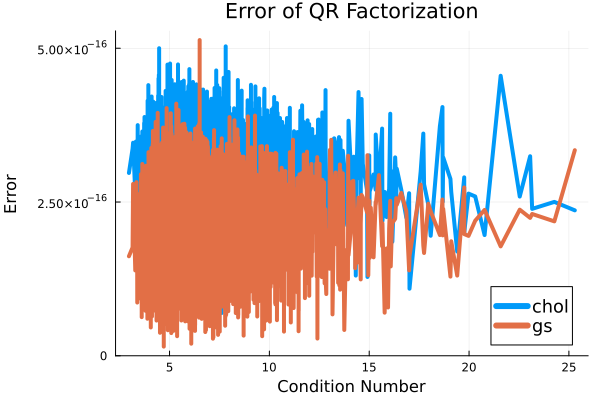

┌ Warning: No strict ticks found
└ @ PlotUtils /opt/julia/packages/PlotUtils/M092a/src/ticks.jl:191
┌ Warning: No strict ticks found
└ @ PlotUtils /opt/julia/packages/PlotUtils/M092a/src/ticks.jl:191


In [131]:
plot(getfield.(y_chol, 1), [getfield.(y_chol, 2), getfield.(y_qr, 2)], title = "Error of QR Factorization", label=["chol" "gs"])
xlabel!("Condition Number")
ylabel!("Error")

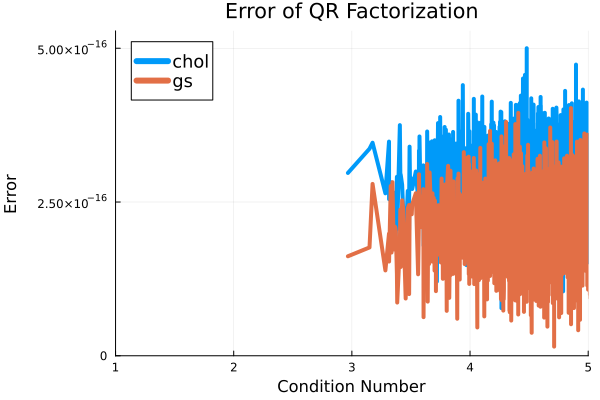

┌ Warning: No strict ticks found
└ @ PlotUtils /opt/julia/packages/PlotUtils/M092a/src/ticks.jl:191
┌ Warning: No strict ticks found
└ @ PlotUtils /opt/julia/packages/PlotUtils/M092a/src/ticks.jl:191


In [132]:
plot(getfield.(y_chol, 1), [getfield.(y_chol, 2), getfield.(y_qr, 2)], title = "Error of QR Factorization", label=["chol" "gs"])
xlims!(1, 5)
xlabel!("Condition Number")
ylabel!("Error")

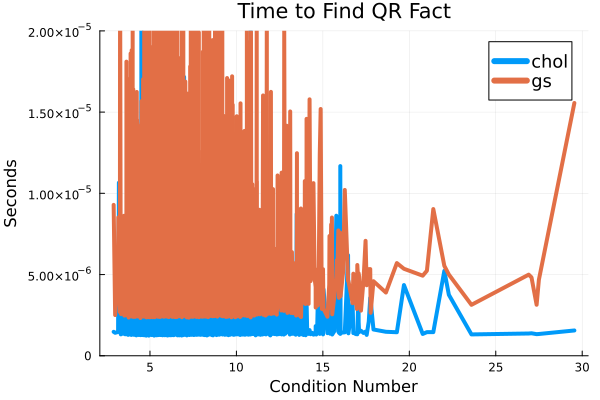

In [93]:
plot(getfield.(y_chol, 1), [getfield.(y_chol, 3), getfield.(y_qr, 3)], title = "Time to Find QR Fact", label=["chol" "gs"])
ylims!(0, 0.00002)
xlabel!("Condition Number")
ylabel!("Seconds")

In [165]:
#function to find least squares solution via QR
function qr_chol_ls(A, b)
    Q, R = qr_chol(A)
    #accuracy = norm(Q * R - A)    #calculating accuracy in this function will render our time unusable
    R_inv = inv(R)    #use Moore-Penrose pseudo inverse to approximate non-invertible R
    sol = norm(R_inv * Q' * b)   #norm of least_squares sol from Cholesky Factor A^TA
    return Q, R, sol
end
function qr_gs_ls(A, b)
    Q, R = gram_schmidt_classical(A)
    #accuracy = norm(Q * R - A)
    R_inv = inv(R)    #use Moore-Penrose pseudo inverse to approximate non-invertible R
    sol = norm(R_inv * Q' * b)   #norm of least_squares sol from Cholesky Factor A^TA
    return Q, R, sol   #norm of least_squares sol from Cholesky Factor A^TA
end
function svd_ls(A, b)
    U, Sigma, V_transpose = svd(A)
    #accuracy = norm(U * Diagonal(Sigma) * V_transpose - A)
    sol = norm(V_transpose' * Diagonal(1 ./ Sigma) * U' * b)
    return U, Sigma, V_transpose, sol 
end

#create three tuple lists
y_chol = []  
y_qr = []
y_svd = []
b = rand(1000)
k = 10
for i in 1:k
    A = rand(1000, 400)
    cond_num = cond(A)
    #chol qr
    sol_time = @elapsed qr_chol_ls(A, b)
    Q_1, R_1, sol = qr_chol_ls(A, b)
    accuracy = norm(Q_1 * R_1 - A)
    push!(y_chol, (cond_num, accuracy, sol, sol_time))
    #grahm schmidt classic
    sol_time = @elapsed qr_gs_ls(A, b)
    Q_2, R_2, sol = qr_chol_ls(A, b)
    accuracy = norm(Q_2 * R_2 - A)
    push!(y_qr, (cond_num, accuracy, sol, sol_time))      #tuple(conditionnumber, error of QR (difference), qr time elapsed, least_squares sol, sol time)
    #Sol via SVD
    sol_time = @elapsed svd_ls(A, b)
    U, Sigma, V_transpose, sol = svd_ls(A, b)
    accuracy = norm((U * Diagonal(Sigma) * V_transpose) - A)
    push!(y_svd, (cond_num, accuracy, sol, sol_time))
end
y_chol = sort(y_chol);  #sort both lists by condition number
y_qr = sort(y_qr);
y_svd = sort(y_svd);
#use getfield.(tuplelist, 1) to get first tuple element as list for plotting

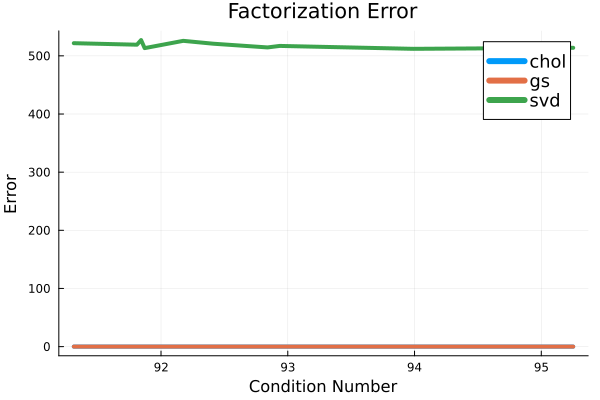

In [166]:
plot(getfield.(y_chol, 1), [getfield.(y_chol, 2), getfield.(y_qr, 2), getfield.(y_svd, 2)], title = "Factorization Error", label=["chol" "gs" "svd"])
xlabel!("Condition Number")
ylabel!("Error")

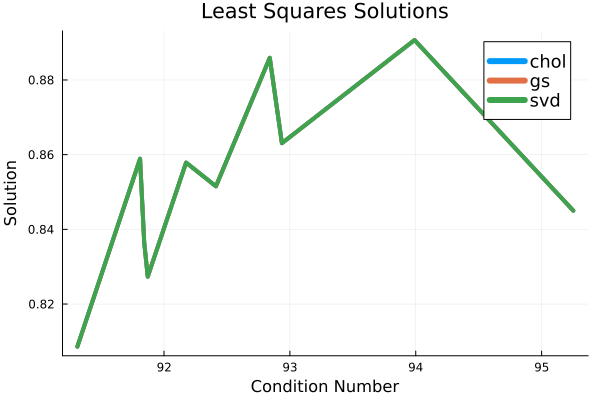

In [172]:
plot(getfield.(y_chol, 1), [getfield.(y_chol, 3), getfield.(y_qr, 3), getfield.(y_svd, 3)], title = "Least Squares Solutions", label=["chol" "gs" "svd"])
#ylims!(0.845, 0.85)
#xlims!(91, 93)
xlabel!("Condition Number")
ylabel!("Solution")

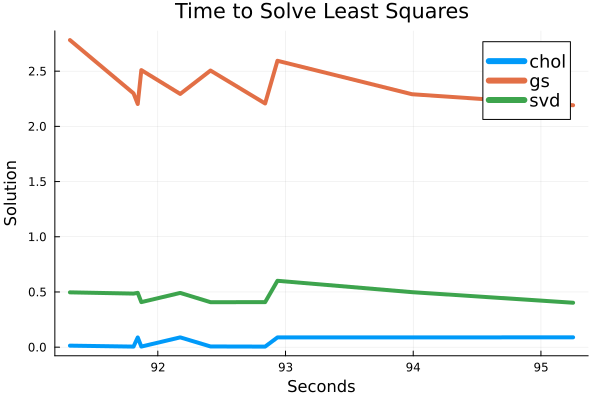

In [169]:
plot(getfield.(y_chol, 1), [getfield.(y_chol, 4), getfield.(y_qr, 4), getfield.(y_svd, 4)], title = "Time to Solve Least Squares", label=["chol" "gs" "svd"])
#ylims!(0, 0.00003)
xlabel!("Seconds")
ylabel!("Solution")